In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

data = pd.read_table("/content/fruit_data_with_colors.txt")

In [ ]:
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [ ]:
print(f"data shape {data.shape}\n")
print(f"fruit name: {data['fruit_name'].unique()}\n")
print("number of each fruit:")
print(data.groupby("fruit_name").size())

data shape (59, 7)

fruit name: ['apple' 'mandarin' 'orange' 'lemon']

number of each fruit:
fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


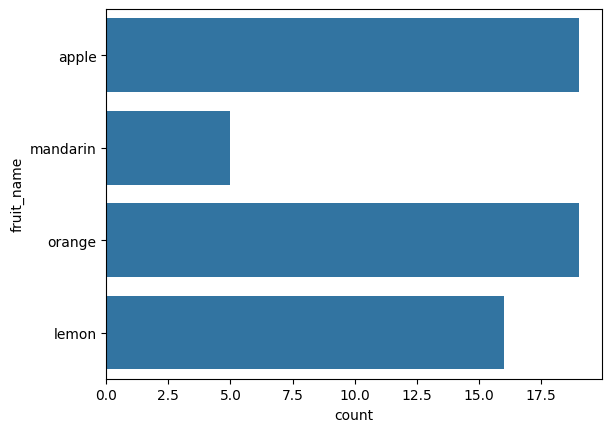

In [ ]:
import seaborn as sns

sns.countplot(data["fruit_name"], label="Count")
plt.show()

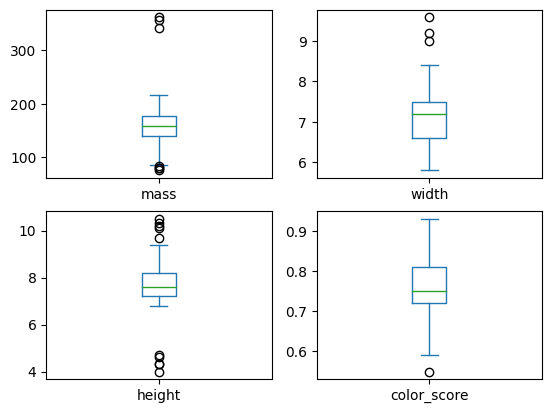

In [ ]:
data.drop("fruit_label", axis=1).plot(
    kind = "box", subplots = True, layout = (2, 2))
plt.savefig("fruit_box")
plt.show()

فينا نشوف أنو بالكل في داتا متطرفة أقل الشي ب

 *color_score*

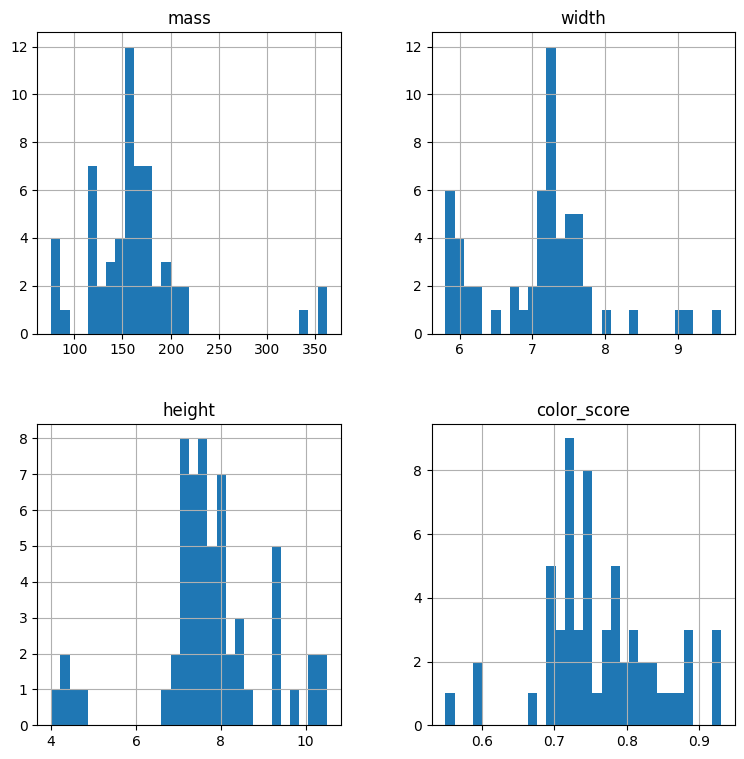

In [ ]:
data.drop("fruit_label", axis=1).hist(bins=30, figsize=(9,9))
plt.savefig("fruit_hist")
plt.show()

In [ ]:
x_feature = ["mass", "width", "height", "color_score" ]
x = data[x_feature]

y_feature = "fruit_label"
y = data[y_feature]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(f"accuracy of training set = {logreg.score(X_train, y_train)}")
print(f"accuracy of testing set = {logreg.score(X_test, y_test)}")

accuracy of training set = 0.75
accuracy of testing set = 0.4666666666666667


# Decision tree

أغلب الأحيان شجرة القرار وقت التدريب بتكون النتائج كتير منيحة
 لكن وقت التدريب بتعطي نتائج أقل

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
print(f"accuracy of training set = {clf.score(X_train, y_train)}")
print(f"accuracy of testing set = {clf.score(X_test, y_test)}")

accuracy of training set = 1.0
accuracy of testing set = 0.6666666666666666


# KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print(f"accuracy of training set = {knn.score(X_train, y_train)}")
print(f"accuracy of testing set = {knn.score(X_test, y_test)}")

accuracy of training set = 0.9545454545454546
accuracy of testing set = 0.8


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = knn.predict(X_test)


In [ ]:
# مصفوفة الارتباك تصف مقدار التصنيف
# كل سطر بمثل صف من الصفوف (نوع فواكه)
#كل عمود كمن بمثل صف
# (1, 1)
# كم وحدة من الصف الأول ومثلها كصف أول
# (1, 2)
#  كم وحدة من الصف الأول بس صنفها كصف ثاني


# [2 0 5 1] مثلا الصف
# هو بالأصل لييمون
# لكن الخوارزمية صنفت 2 أنهن تفاح و 5 ليمون و 1 برتقال

print(confusion_matrix(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [2 0 5 1]
 [0 0 0 2]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       1.00      0.62      0.77         8
           4       0.67      1.00      0.80         2

    accuracy                           0.80        15
   macro avg       0.83      0.91      0.84        15
weighted avg       0.87      0.80      0.80        15



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
print(f"accuracy of training set = {gnb.score(X_train, y_train)}")
print(f"accuracy of testing set = {gnb.score(X_test, y_test)}")

accuracy of training set = 0.8636363636363636
accuracy of testing set = 0.4666666666666667


# Support Vector

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
print(f"accuracy of training set = {svm.score(X_train, y_train)}")
print(f"accuracy of testing set = {svm.score(X_test, y_test)}")

accuracy of training set = 0.9090909090909091
accuracy of testing set = 0.7333333333333333
